In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from skimage import measure
from scipy.special import zeta

%matplotlib inline

# Problem 3:

In [3]:
#How many tests do you want to create?
N_tests = 100

#determine the probability of having a tree at a site in the lattice:
rho     = np.linspace(0,1,100)
not_rho = np.subtract(1,rho) 

#what  is the lattice size?
L = 20

#generate the lattice:
lattices = [np.random.choice([0,1], p=[not_rho[i], rho[i]], replace=True, size=(L, L)) for i in range(N_tests)] 

In [4]:
#find the longest connected component for each generated lattice:
lcc = [measure.label(l, neighbors=4, return_num=True) for l in lattices]

In [3]:
#get size for each connected component:
def get_size_cc(l_c_c):
    """
        GET_SIZE_LCC: finds all connected components and returns an array of their sizes
        
        l_c_c: an array containing a lattice of connected components.
        
        Returns: an array of dictionaries, representing the unique connected component sizes of each lattice
    """
    
    #get a size for each connected component:
    counts = [np.unique(l[0], return_counts=True) for l in l_c_c]
    
    #turn counts into dictionaries:
    counts = [dict(zip(c[0],c[1])) for c in counts]
    
    #knock out all dictionary elements with a key of 0 (these are the number of 0's in the lattice):
    for c in counts:
        try:
            del c[0]
        except KeyError:
            pass
    
    return counts

In [4]:
#get the largest connected component:
def get_lcc(count_dics):
    """
        GET_LCC: finds the largest connected component in each count dictionary created by get_size_cc
    """
    
    #populate empty arrays (we assume  that it is just the first):
    try:
        del count_dics[0] 
    except:
        pass
    
    #now find the largest count:
    lcc = [max(c.values()) for c in count_dics]
        
    return np.array(lcc)

In [7]:
#get a size for each connected component:
counts = get_size_cc(lcc)

#get the longest connected component for each lattice:
gcc = get_lcc(counts)

#### Part a. Carry out this process for L = 50, 100, 200, 500, and 1000:

In [5]:
#generate Lattices:
def gen_lattices(L, rho, not_rho, N_tests):
    """
        GEN_LATTICES: Generates a random lattice of size LxL, for N_tests number of times
                      Each site in the lattice as probability rho of being a 1
    """
    
    #generate a lattice of 0's and 1's:
    l = [np.random.choice([0,1], p=[not_rho[i], rho[i]], replace=True, size=(L, L)) for i in range(N_tests)]
    
    return l

In [6]:
def get_unique_components(lattice):
    """
        GET_UNIQUE_COMPONENTS: takes a lattice and labels the unique connected components
    """
    
    ccs = [measure.label(l, neighbors=4, return_num=True) for l in lattice]
    
    return ccs

In [7]:
def generate_all(L,rho,not_rho,N_tests):
    """
        DOCSTRING:
    """
    gcc = []
    
    for n in range(N_tests):
        
        #initialize the lattices:
        lat = gen_lattices(L,rho,not_rho,N_tests)
        
        #label the connected components:
        lcc = get_unique_components(lat)
        
        #get the sizes of each connected component:
        counts = get_size_cc(lcc)
        
        #get the longest connected component:
        g = get_lcc(counts)
        
        gcc.append(g)
    
    #take the average column wise:
    gcc = np.mean(gcc, axis=0)
    return gcc

#### L=50

In [11]:
#define the lattice dimmensions:
L = 50

#get the max connected commponents:
lattice_50 = gen_lattices(L,rho,not_rho,N_tests)

#label the connected components:
lcc_50 = get_unique_components(lattice_50)

#get the sizes of each connected component:
counts_50 = get_size_cc(lcc_50)

#get the longest connected component for each lattice:
gcc_50 = get_lcc(counts_50)

#### L=100

In [12]:
#define the lattice dimmensions:
L = 100

#get the max connected commponents:
lattice_100 = gen_lattices(L,rho,not_rho,N_tests)

#label the connected components:
lcc_100 = get_unique_components(lattice_100)

#get the sizes of each connected component:
counts_100 = get_size_cc(lcc_100)

#get the longest connected component for each lattice:
gcc_100 = get_lcc(counts_100)

#### L=200

In [13]:
#define the lattice dimmensions:
L = 200

#get the max connected commponents:
lattice_200 = gen_lattices(L,rho,not_rho,N_tests)

#label the connected components:
lcc_200 = get_unique_components(lattice_200)

#get the sizes of each connected component:
counts_200 = get_size_cc(lcc_200)

#get the longest connected component for each lattice:
gcc_200 = get_lcc(counts_200)

#### L=500

In [14]:
#define the lattice dimmensions:
L = 500

#get the max connected commponents:
lattice_500 = gen_lattices(L,rho,not_rho,N_tests)

#label the connected components:
lcc_500 = get_unique_components(lattice_500)

#get the sizes of each connected component:
counts_500 = get_size_cc(lcc_500)

#get the longest connected component for each lattice:
gcc_500 = get_lcc(counts_500)

#### L=1000

In [15]:
#define the lattice dimmensions:
L = 1000

#get the max connected commponents:
lattice_1000 = gen_lattices(L,rho,not_rho,N_tests)

#label the connected components:
lcc_1000 = get_unique_components(lattice_1000)

#get the sizes of each connected component:
counts_1000 = get_size_cc(lcc_1000)

#get the longest connected component for each lattice:
gcc_1000 = get_lcc(counts_1000)

#### Plot max largest connected component with respect to $\rho$

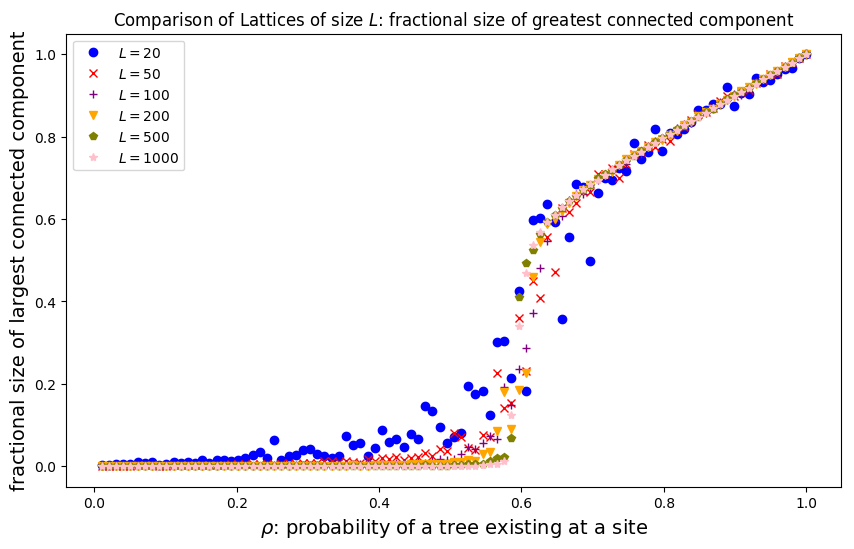

In [16]:
#initialize a plot:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')

plt.plot(rho[1:], gcc/(20**2), 'o', color='blue', label= r'$L = 20$')
plt.plot(rho[1:], gcc_50/(50**2), 'x', color='red', label= r'$L = 50$')
plt.plot(rho[1:], gcc_100/(100**2), '+', color='purple', label= r'$L = 100$')
plt.plot(rho[1:], gcc_200/(200**2), 'v', color='orange', label= r'$L = 200$')
plt.plot(rho[1:], gcc_500/(500**2), 'p', color='olive', label= r'$L = 500$')
plt.plot(rho[1:], gcc_1000/(1000**2), '*', color='pink', label= r'$L = 1000$')

plt.ylabel('fractional size of largest connected component', fontsize=14)
plt.xlabel(r'$\rho$: probability of a tree existing at a site', fontsize=14)
plt.title(r'Comparison of Lattices of size $L$: fractional size of greatest connected component')
plt.legend(loc='upper left')
plt.show()

#### Let's do this 100 times for each $L$ ... I guess

In [18]:
#define the lattice dimmensions:
L=20

#get the longest connected component for each lattice:
gcc_20 = generate_all(L,rho,not_rho,N_tests)

In [19]:
#define the lattice dimmensions:
L=50

#get the longest connected component for each lattice:
gcc_50 = generate_all(L,rho,not_rho,N_tests)

In [20]:
#define the lattice dimmensions:
L=100

#get the longest connected component for each lattice:
gcc_100 = generate_all(L,rho,not_rho,N_tests)

In [21]:
#define the lattice dimmensions:
L=200


#get the longest connected component for each lattice:
gcc_200 = generate_all(L,rho,not_rho,N_tests)

In [22]:
#define the lattice dimmensions:
L=500

#get the max connected commponents:
gcc_500 = generate_all(L,rho,not_rho,N_tests)

In [23]:
#define the lattice dimensions:
L=1000

#get the max connected components:
gcc_1000 = generate_all(L,rho,not_rho,N_tests)

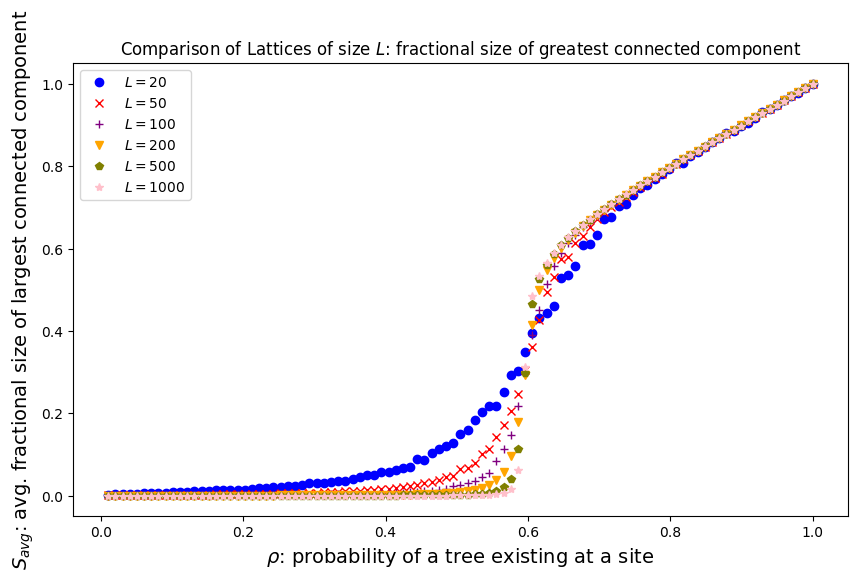

In [24]:
#initialize a plot:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')

plt.plot(rho[1:], gcc_20/(20**2), 'o', color='blue', label= r'$L = 20$')
plt.plot(rho[1:], gcc_50/(50**2), 'x', color='red', label= r'$L = 50$')
plt.plot(rho[1:], gcc_100/(100**2), '+', color='purple', label= r'$L = 100$')
plt.plot(rho[1:], gcc_200/(200**2), 'v', color='orange', label= r'$L = 200$')
plt.plot(rho[1:], gcc_500/(500**2), 'p', color='olive', label= r'$L = 500$')
plt.plot(rho[1:], gcc_1000/(1000**2), '*', color='pink', label= r'$L = 1000$')

plt.ylabel(r'$S_{avg}$: avg. fractional size of largest connected component', fontsize=14)
plt.xlabel(r'$\rho$: probability of a tree existing at a site', fontsize=14)
plt.title(r'Comparison of Lattices of size $L$: fractional size of greatest connected component')
plt.legend(loc='upper left')
plt.show()

#### Part b:

In [38]:
#critical 
rho_critical = 0.57

def find_Savg_critical(L, rho_c, N_tests):
    """
        DOCSTRING
    """
    
    #generate the lattices:
    lattices = np.random.choice([0,1],p=[1-rho_c, rho_c], replace=True, size=(N_tests, L, L))
    
    #for each lattice, label the connected components:
    connected = get_unique_components(lattices)
    
    #calculate the lengths of each component:
    counts = [np.unique(c[0],return_counts=True) for c in connected]
    counts = [dict(zip(c[0],c[1])) for c in counts]
    for c in counts:
        try:
            del c[0]
        except:
            pass
    
    #initialize a dictionary containing every found 
    set_of_values = set(v for i in range(len(counts)) for c,v in counts[i].items())
    size_of_component = {c: 0 for c in set_of_values}
    
    #go through each dictionary and count the number of times a value occurs:
    for c in counts:
        for v in c.values():
            if v in set_of_values:
                size_of_component[v]+=1
    
    #average each value:
    size_of_component = {k: v  for k, v in size_of_component.items()}
    
    return size_of_component

In [39]:
gcc_1000 = find_Savg_critical(1000, rho_critical, 100)

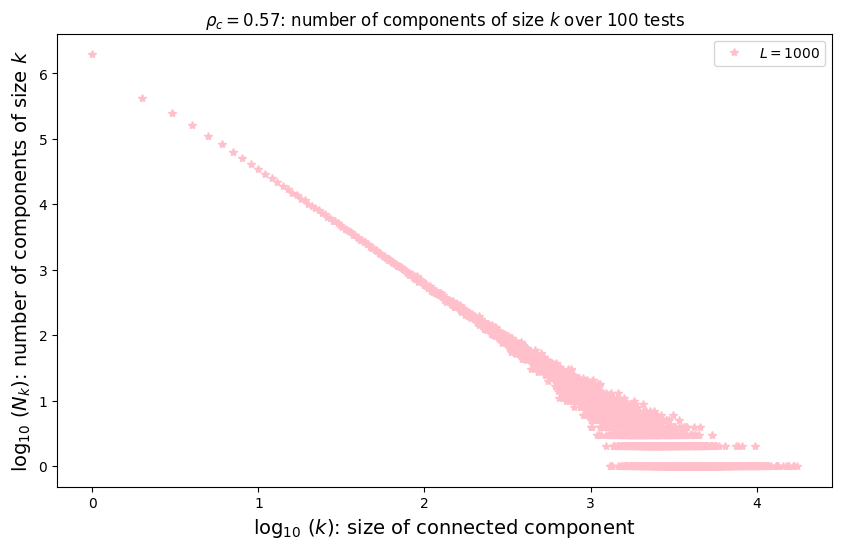

In [40]:
#initialize a plot:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
x = list(gcc_1000.keys())
y =  list(gcc_1000.values())
plt.plot(np.log10(x),np.log10(y), '*', color='pink', label= r'$L = 1000$')

plt.ylabel(r'$\log_{10}\ ( N_k )$: number of components of size $k$', fontsize=14)
plt.xlabel(r'$\log_{10}\ (k)$: size of connected component', fontsize=14)
plt.title(r'$\rho_c = 0.57$: number of components of size $k$ over 100 tests')
plt.legend(loc='upper right')
plt.show()

In [41]:
rho = rho_critical/2
rho2 = rho_critical + (1-rho_critical)/2

In [42]:
gcc_1000 = find_Savg_critical(1000, rho, 100)

In [43]:
rho

0.285

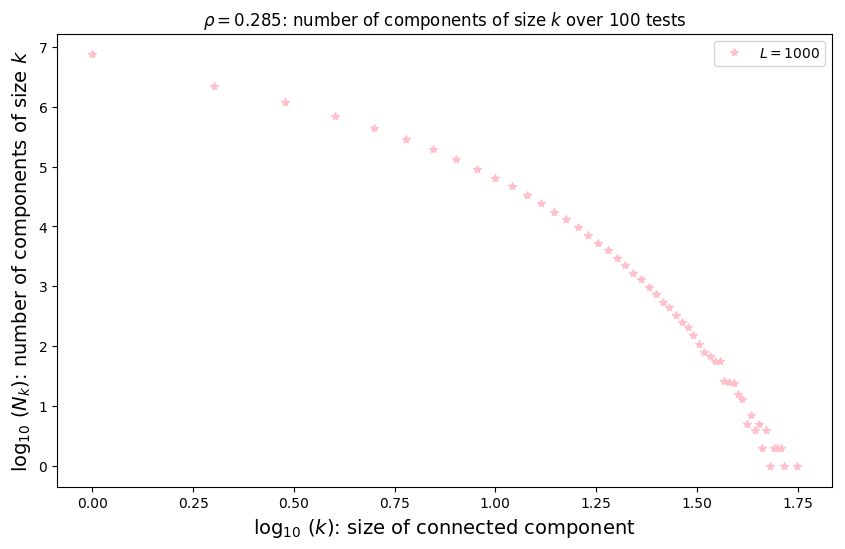

In [44]:
#initialize a plot:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
x = list(gcc_1000.keys())
y =  list(gcc_1000.values())
plt.plot(np.log10(x),np.log10(y), '*', color='pink', label= r'$L = 1000$')

plt.ylabel(r'$\log_{10}\ ( N_k )$: number of components of size $k$', fontsize=14)
plt.xlabel(r'$\log_{10}\ (k)$: size of connected component', fontsize=14)
plt.title(r'$\rho = 0.285$: number of components of size $k$ over 100 tests')
plt.legend(loc='upper right')
plt.show()

In [45]:
rho2

0.7849999999999999

In [46]:
gcc_1000 = find_Savg_critical(1000,rho2, 100)

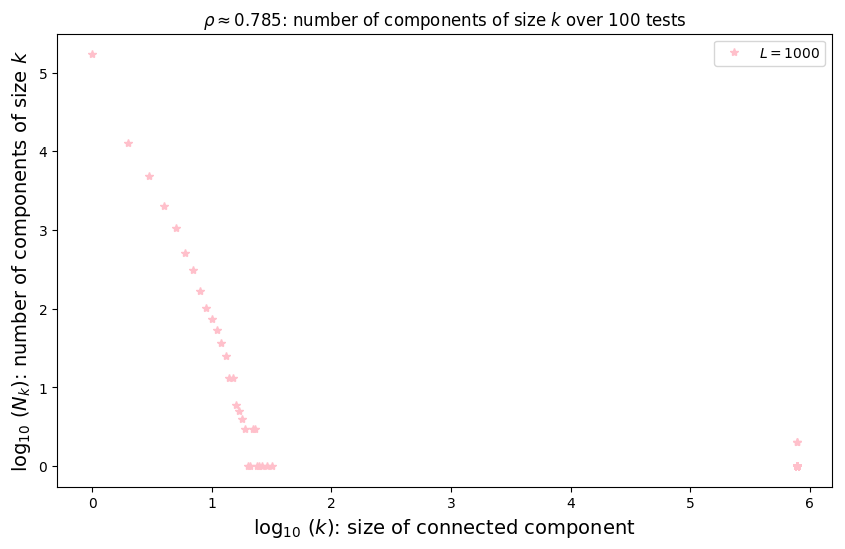

In [49]:
#initialize a plot:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
x = list(gcc_1000.keys())
y =  list(gcc_1000.values())
plt.plot(np.log10(x),np.log10(y), '*', color='pink', label= r'$L = 1000$')

plt.ylabel(r'$\log_{10}\ ( N_k )$: number of components of size $k$', fontsize=14)
plt.xlabel(r'$\log_{10}\ (k)$: size of connected component', fontsize=14)
plt.title(r'$\rho \approx 0.785$: number of components of size $k$ over 100 tests')
plt.legend(loc='upper right')
plt.show()

# Problem 5:

In [1]:
#We will want to generate a power-law distribution:

#define a gamma, upper bound of k, and lower bound of k:
gamma   = 3/2
u_bound = 10**6
l_bound = 1

#generate the distribution:
distribution_N = np.random.zipf(gamma,size=u_bound) 

NameError: name 'np' is not defined

In [6]:
N_10 = [ max(np.random.choice(distribution_N, size=10, replace=True)) for i in range(1000)]

In [7]:
N_100 = [max(np.random.choice(distribution_N, size=100, replace=True)) for i in range(1000)]

In [8]:
N_1000 = [max(np.random.choice(distribution_N, size=1000, replace=True)) for i in range(1000)]

In [9]:
N_10e4 = [max(np.random.choice(distribution_N, size=10**4, replace=True)) for i in range(1000)]

In [10]:
N_10e5 = [max(np.random.choice(distribution_N, size=10**5, replace=True)) for i in range(1000)]

In [11]:
N_10e6 = [max(np.random.choice(distribution_N, size=10**6, replace=True)) for i in range(1000)]

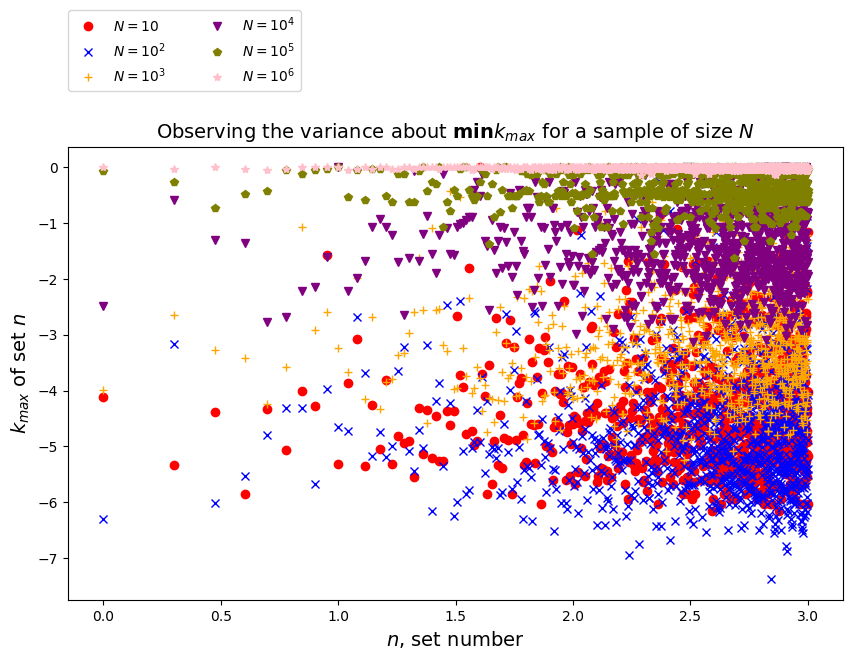

In [12]:
#plot them:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')

plt.plot([np.log10(i) for i in range(l_bound, 1000+1)], np.log10(N_10/max(N_10)), 'o', color='red', label=r'$N=10$')
plt.plot([np.log10(i) for i in range(l_bound, 1000+1)], np.log10(N_100/max(N_100)), 'x', color='blue', label=r'$N=10^2$')
plt.plot([np.log10(i) for i in range(l_bound, 1000+1)], np.log10(N_1000/max(N_1000)), '+', color='orange', label=r'$N=10^3$')
plt.plot([np.log10(i) for i in range(l_bound, 1000+1)], np.log10(N_10e4/max(N_10e4)), 'v', color='purple', label=r'$N=10^4$')
plt.plot([np.log10(i) for i in range(l_bound, 1000+1)], np.log10(N_10e5/max(N_10e5)), 'p', color='olive', label=r'$N=10^5$')
plt.plot([np.log10(i) for i in range(l_bound, 1000+1)], np.log10(N_10e6/max(N_10e6)), '*', color='pink', label=r'$N=10^6$')

plt.title(r'Observing the variance about $\mathbf{min}k_{max}$ for a sample of size $N$ ', fontsize=14)
plt.xlabel(r'$n$, set number',fontsize=14)
plt.ylabel(r'$k_{max}$ of set $n$',fontsize=14)
plt.legend(bbox_to_anchor=(0., 1.2, 0.3, .102), loc=1,
           ncol=2, mode="expand", borderaxespad=0.)

In [13]:
avg_10 = np.average(N_10/max(N_10))
avg_10e2 = np.average(N_100/max(N_100))
avg_10e3 = np.average(N_1000/max(N_1000))
avg_10e4 = np.average(N_10e4/max(N_10e4))
avg_10e5 = np.average(N_10e5/max(N_10e5))
avg_10e6 = np.average(N_10e6//max(N_10e6))

In [14]:
avgs = np.array([avg_10.item(0), avg_10e2.item(0), avg_10e3.item(0), avg_10e4.item(0), avg_10e5.item(0), avg_10e6.item(0)])
pr_kmax = [10,10**2,10**3,10**4,10**5,10**6]

slopea, intercepta, r_valuea, p_valuea, std_erra = stats.linregress(np.log10(pr_kmax), np.log10(avgs))

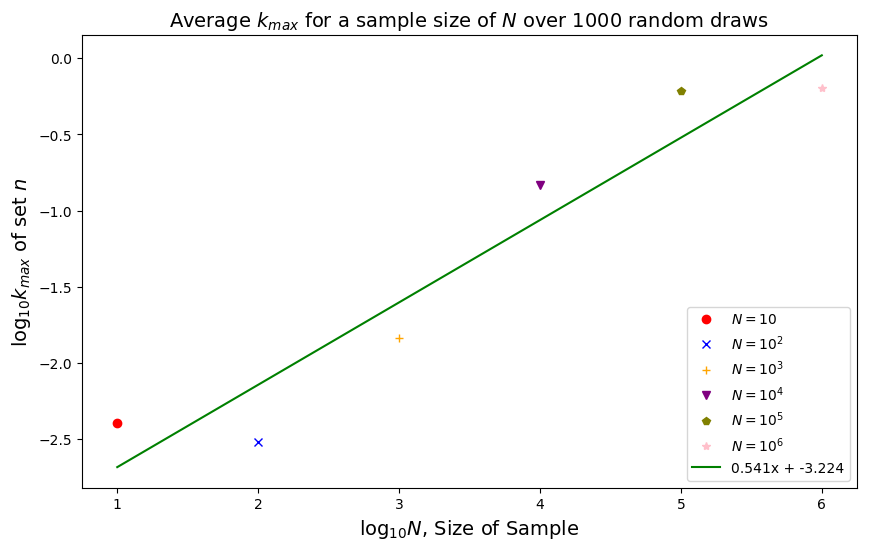

In [15]:
x = np.linspace(1,6,1000)
y = x*slopea + intercepta
#plot them:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')

plt.plot(1, np.log10(avg_10), 'o', color='red', label=r'$N=10$')
plt.plot(2, np.log10(avg_10e2), 'x', color='blue', label=r'$N=10^2$')
plt.plot(3, np.log10(avg_10e3), '+', color='orange', label=r'$N=10^3$')
plt.plot(4, np.log10(avg_10e4), 'v', color='purple', label=r'$N=10^4$')
plt.plot(5, np.log10(avg_10e5), 'p', color='olive', label=r'$N=10^5$')
plt.plot(6, np.log10(avg_10e6), '*', color='pink', label=r'$N=10^6$')

plt.plot(x,y,color='green',label=r'{}x + {}'.format(round(slopea,3), round(intercepta,3)))
plt.title(r'Average $k_{max}$ for a sample size of $N$ over 1000 random draws', fontsize=14)
plt.xlabel(r'$\log_{10}N$, Size of Sample',fontsize=14)
plt.ylabel(r'$\log_{10}k_{max}$ of set $n$',fontsize=14)
plt.legend(loc='lower right')

In [120]:
#We will want to generate a power-law distribution:

#define a gamma, upper bound of k, and lower bound of k:
gamma   = 5/2
u_bound = 10**6
l_bound = 1

#generate the distribution:
distribution_N = np.random.zipf(gamma,size=u_bound) 

In [121]:
N_10 = [ max(np.random.choice(distribution_N, size=10, replace=True)) for i in range(1000)]

In [122]:
N_100 = [max(np.random.choice(distribution_N, size=100, replace=True)) for i in range(1000)]

In [123]:
N_1000 = [max(np.random.choice(distribution_N, size=1000, replace=True)) for i in range(1000)]

In [124]:
N_10e4 = [max(np.random.choice(distribution_N, size=10**4, replace=True)) for i in range(1000)]

In [125]:
N_10e5 = [max(np.random.choice(distribution_N, size=10**5, replace=True)) for i in range(1000)]

In [126]:
N_10e6 = [max(np.random.choice(distribution_N, size=10**6, replace=True)) for i in range(1000)]

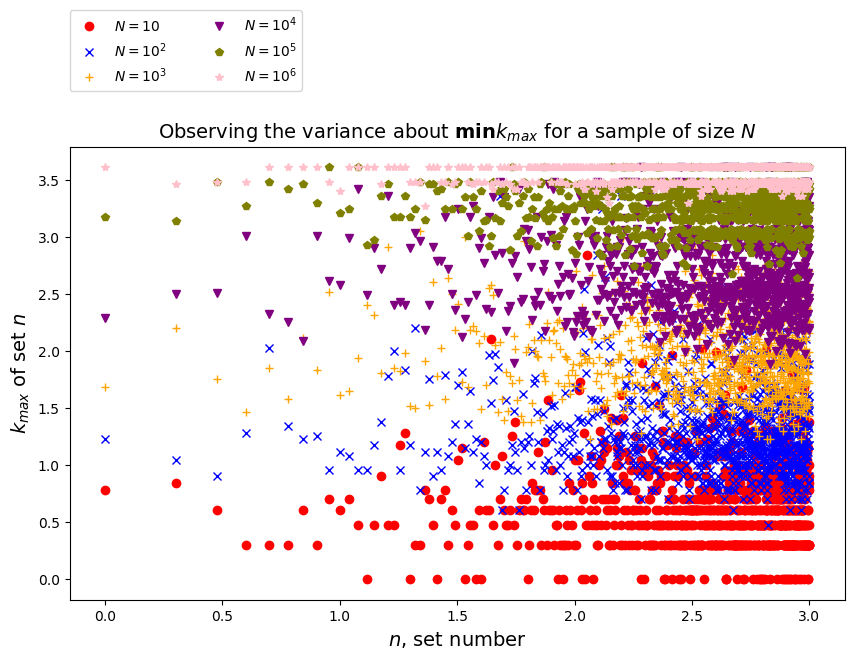

In [131]:
#plot them:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')

plt.plot([np.log10(i) for i in range(l_bound, 1000+1)], np.log10(N_10), 'o', color='red', label=r'$N=10$')
plt.plot([np.log10(i) for i in range(l_bound, 1000+1)], np.log10(N_100), 'x', color='blue', label=r'$N=10^2$')
plt.plot([np.log10(i) for i in range(l_bound, 1000+1)], np.log10(N_1000), '+', color='orange', label=r'$N=10^3$')
plt.plot([np.log10(i) for i in range(l_bound, 1000+1)], np.log10(N_10e4), 'v', color='purple', label=r'$N=10^4$')
plt.plot([np.log10(i) for i in range(l_bound, 1000+1)], np.log10(N_10e5), 'p', color='olive', label=r'$N=10^5$')
plt.plot([np.log10(i) for i in range(l_bound, 1000+1)], np.log10(N_10e6), '*', color='pink', label=r'$N=10^6$')

plt.title(r'Observing the variance about $\mathbf{min}k_{max}$ for a sample of size $N$ ', fontsize=14)
plt.xlabel(r'$n$, set number',fontsize=14)
plt.ylabel(r'$k_{max}$ of set $n$',fontsize=14)
plt.legend(bbox_to_anchor=(0., 1.2, 0.3, .102), loc=1,
           ncol=2, mode="expand", borderaxespad=0.)

In [128]:
avg_10 = np.average(N_10)
avg_10e2 = np.average(N_100)
avg_10e3 = np.average(N_1000)
avg_10e4 = np.average(N_10e4)
avg_10e5 = np.average(N_10e5)
avg_10e6 = np.average(N_10e6)

In [129]:
avgs = np.array([avg_10.item(0), avg_10e2.item(0), avg_10e3.item(0), avg_10e4.item(0), avg_10e5.item(0), avg_10e6.item(0)])
pr_kmax = [10,10**2,10**3,10**4,10**5,10**6]

slopea, intercepta, r_valuea, p_valuea, std_erra = stats.linregress(np.log10(pr_kmax), np.log10(avgs))

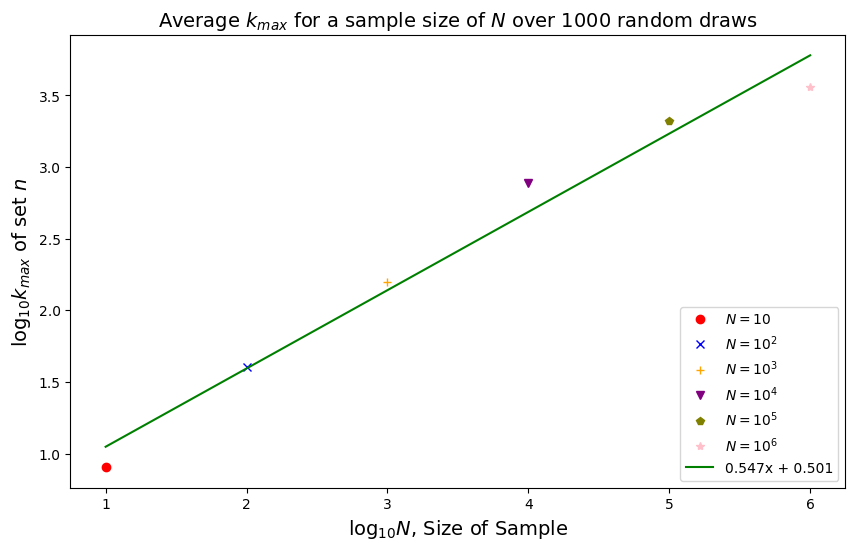

In [132]:
x = np.linspace(1,6,1000)
y = x*slopea + intercepta
#plot them:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')

plt.plot(1, np.log10(avg_10), 'o', color='red', label=r'$N=10$')
plt.plot(2, np.log10(avg_10e2), 'x', color='blue', label=r'$N=10^2$')
plt.plot(3, np.log10(avg_10e3), '+', color='orange', label=r'$N=10^3$')
plt.plot(4, np.log10(avg_10e4), 'v', color='purple', label=r'$N=10^4$')
plt.plot(5, np.log10(avg_10e5), 'p', color='olive', label=r'$N=10^5$')
plt.plot(6, np.log10(avg_10e6), '*', color='pink', label=r'$N=10^6$')

plt.plot(x,y,color='green',label=r'{}x + {}'.format(round(slopea,3), round(intercepta,3)))
plt.title(r'Average $k_{max}$ for a sample size of $N$ over 1000 random draws', fontsize=14)
plt.xlabel(r'$\log_{10}N$, Size of Sample',fontsize=14)
plt.ylabel(r'$\log_{10}k_{max}$ of set $n$',fontsize=14)
plt.legend(loc='lower right')